First 5 rows of the dataset:
   Order ID     Product     Category  Quantity  Price  Sales  Profit Customer  \
0      1001      Laptop  Electronics         1   1000   1000     200    Alice   
1      1002  Smartphone  Electronics         2    500   1000     150      Bob   
2      1003      Tablet  Electronics         3    200    600     100  Charlie   
3      1004  Headphones  Accessories         2    100    200      50    David   
4      1005  Smartwatch  Electronics         1    300    300      80      Eve   

         Date  
0  2023-01-10  
1  2023-01-15  
2  2023-02-10  
3  2023-02-12  
4  2023-03-01  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order ID  5 non-null      int64 
 1   Product   5 non-null      object
 2   Category  5 non-null      object
 3   Quantity  5 non-null      int64 
 4   Price     5 non-null      int64 


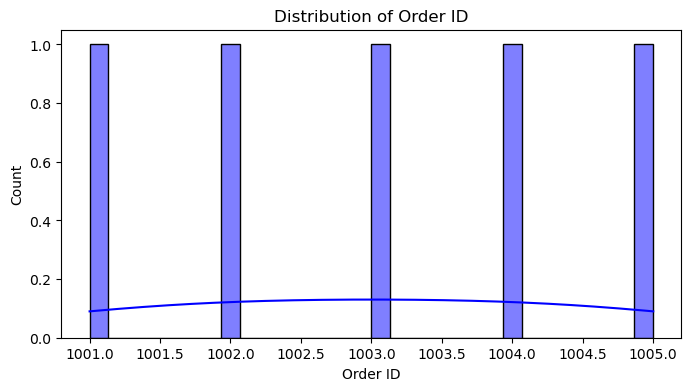

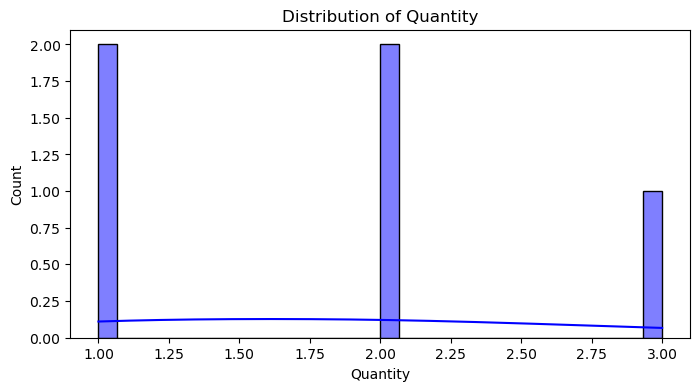

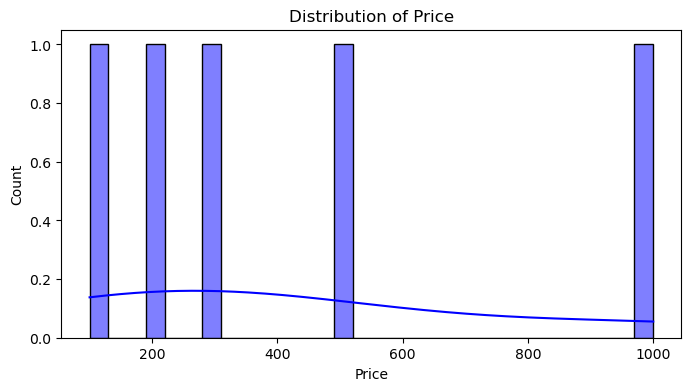

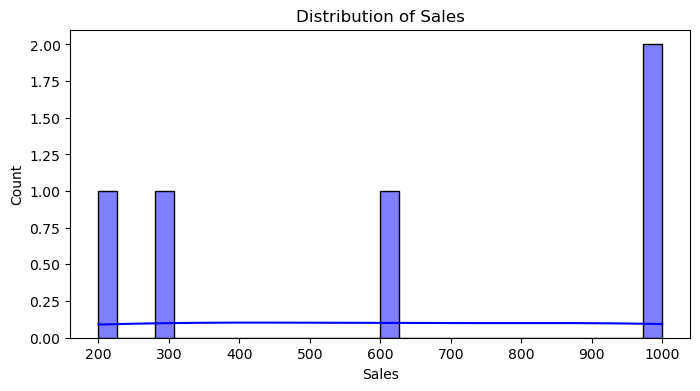

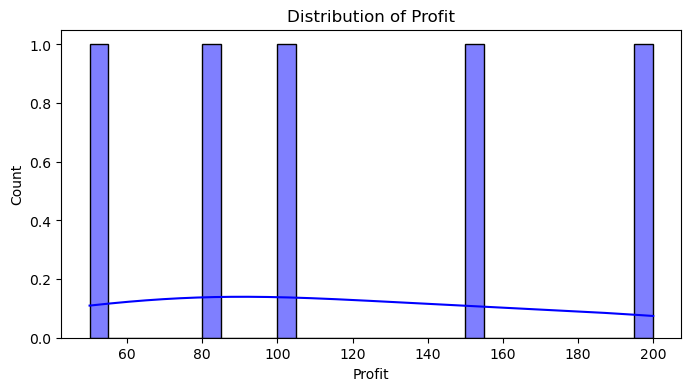

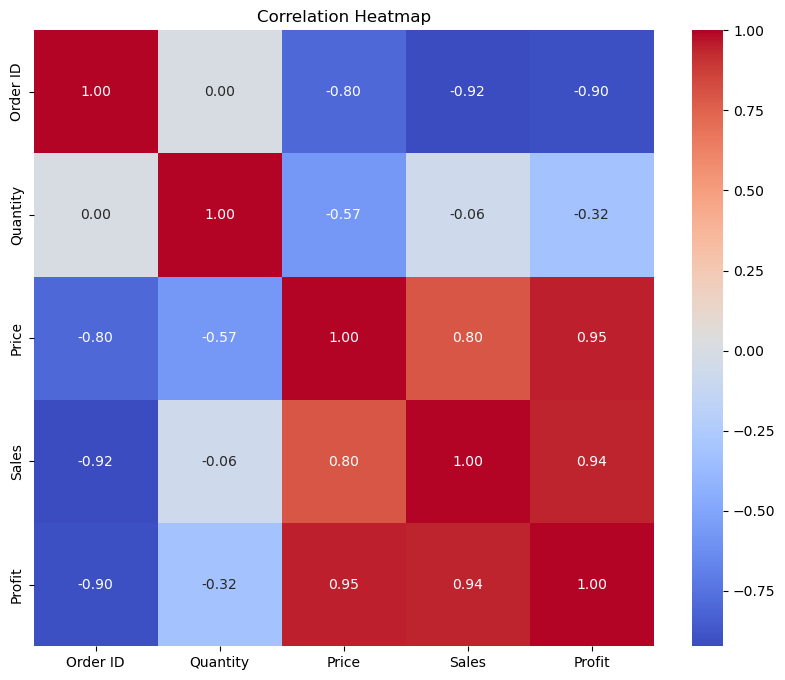

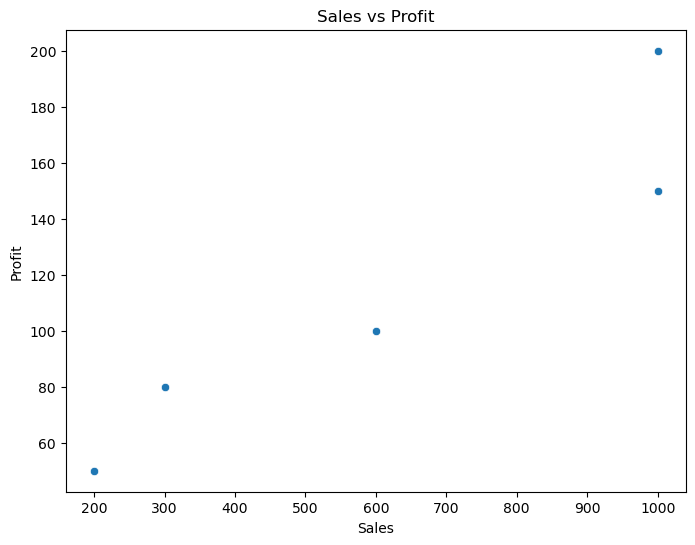

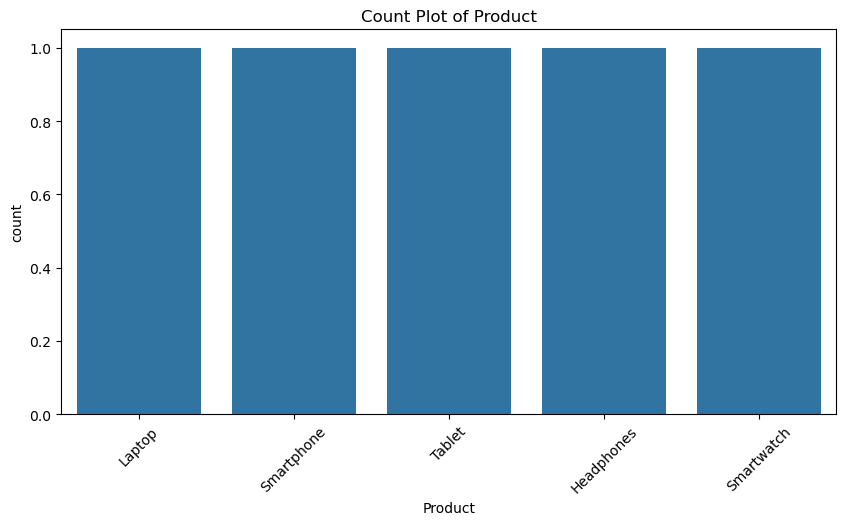

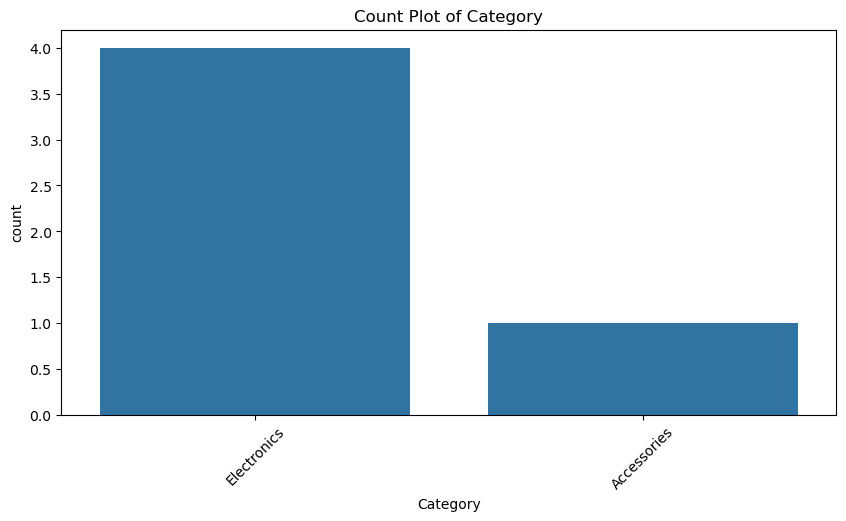

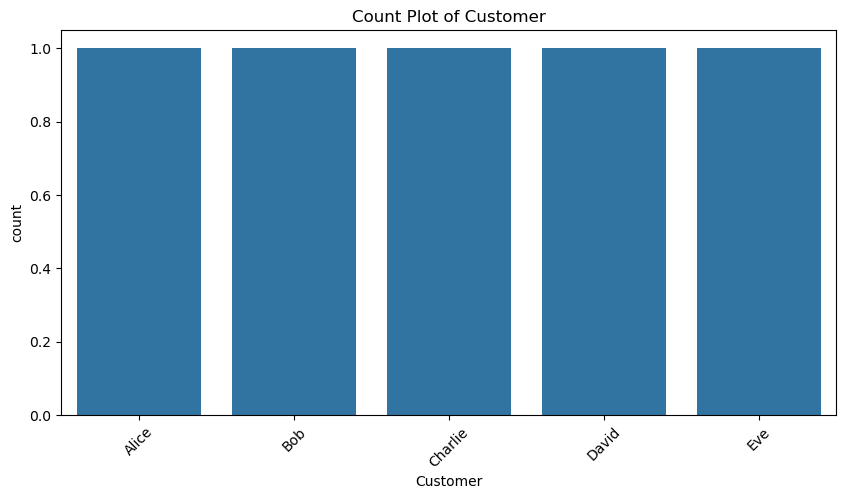

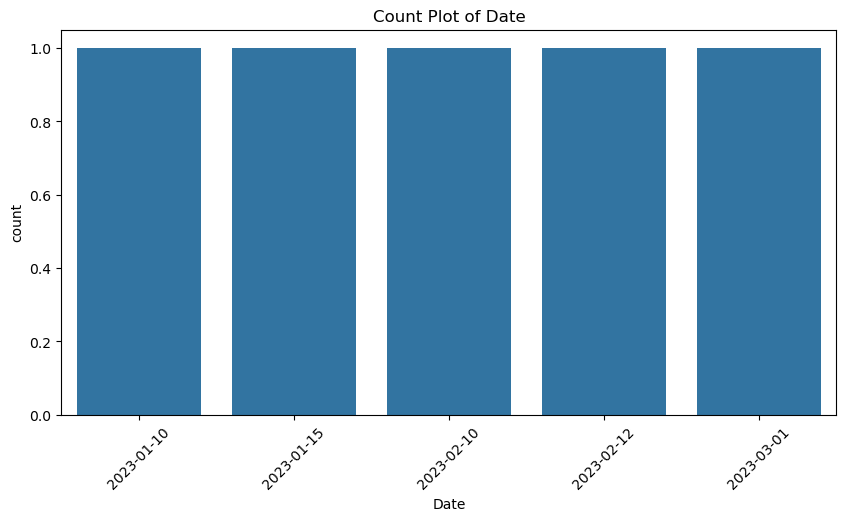


Key Insights:
Total rows: 5, Total columns: 9
Top categories by sales:
Category
Electronics    2900
Accessories     200
Name: Sales, dtype: int64

Average sales by category:
Category
Electronics    725.0
Accessories    200.0
Name: Sales, dtype: float64


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the retail dataset
file_path = "retail_data.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Step 1: Basic Data Exploration
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Step 2: Handle Missing Data
# Fill missing numeric values with the mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing non-numeric values with "Unknown"
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
data[non_numeric_columns] = data[non_numeric_columns].fillna("Unknown")

# Step 3: Check for Duplicate Rows
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicate rows removed.")

# Step 4: Univariate Analysis
print("\nColumn Value Counts:")
for column in data.columns:
    if data[column].dtype == 'object':
        print(f"\n{column} Value Counts:")
        print(data[column].value_counts())

# Plot distribution of numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.show()

# Step 5: Multivariate Analysis
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot for a sample numeric relationship (if applicable)
if 'Sales' in data.columns and 'Profit' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Sales', y='Profit', data=data)
    plt.title("Sales vs Profit")
    plt.xlabel("Sales")
    plt.ylabel("Profit")
    plt.show()

# Step 6: Categorical Data Analysis
# Count plot for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()

# Step 7: Key Insights
print("\nKey Insights:")
print(f"Total rows: {data.shape[0]}, Total columns: {data.shape[1]}")
print("Top categories by sales:")
if 'Category' in data.columns and 'Sales' in data.columns:
    print(data.groupby('Category')['Sales'].sum().sort_values(ascending=False))

print("\nAverage sales by category:")
if 'Category' in data.columns and 'Sales' in data.columns:
    print(data.groupby('Category')['Sales'].mean().sort_values(ascending=False))


